In [1]:
import json, requests
import nltk
import re
from nltk.corpus import sentiwordnet as swn
import time
import timeit
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
import pandas as pd
import numpy as np
import urllib.request, urllib.parse, urllib.error
import datetime

import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.stats import zscore

from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

from transformers import pipeline

import pyspark
import sys
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from operator import add
from pprint import pprint
import random
from random import sample 
from pyspark import SparkConf, SparkContext
from datetime import datetime
from operator import itemgetter
sc = pyspark.SparkContext.getOrCreate()



# Column (Y Axis) vs Index (X Axis) Index equals row

In [2]:
bitcoin = pd.read_csv("C:\\Users\\mgall\\OneDrive\\Desktop\\bitcoin.csv")

In [3]:
# Drop URL
bitcoin = bitcoin.drop('url', 1)

In [4]:
# Drop URL Images
bitcoin = bitcoin.drop('urlToImage', 1)

In [5]:
# Drop Source
bitcoin = bitcoin.drop('source', 1)

In [6]:
# Drop Author
bitcoin = bitcoin.drop('author', 1)

In [7]:
bitcoin = bitcoin.drop('description', 1)

In [8]:
bitcoin = bitcoin.drop('content', 1)

In [9]:
bitcoin = bitcoin.rename(columns={'title': 'Sentence'})

In [10]:
bitcoin = bitcoin.rename(columns={'publishedAt': 'Time'})

In [11]:
txt = bitcoin

In [12]:
txt

,Sentence,Time
0,Travelex Reportedly Paid Ransomware Hackers 28...,2020-04-09T21:40:00Z
1,WSJ: Travelex paid ransomware ring $2.3 million,2020-04-09T23:39:27Z
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31T10:07:07Z
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28T10:16:38Z
4,Satoshi Nakaboto: ‘Exchanges see 10% of Bitcoi...,2020-04-15T09:03:30Z
...,...,...
95,Bitcoin’s Huge Surge This Week Could Be The Ti...,2020-04-04T10:00:55Z
96,Coinbase Co-Founder Invests In Project To Brid...,2020-04-03T22:18:09Z
97,Visa Is About To Make Bitcoin Spending Easier ...,2020-04-13T07:57:31Z
98,Just One Major Cryptocurrency Is Outperforming...,2020-04-03T06:39:25Z


In [13]:
#### SORT

txt = txt.sort_values(by='Time', ascending=True)
txt

,Sentence,Time
44,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29T07:00:00Z
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30T10:25:24Z
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30T11:24:39Z
41,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31T10:05:03Z
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31T10:07:07Z
...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,2020-04-27T10:47:17Z
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",2020-04-27T13:32:34Z
30,New Android ransomware threatens to ‘expose’ y...,2020-04-28T10:00:51Z
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28T10:16:38Z


In [14]:
# Remove Z

txt['Time'] = txt['Time'].map(lambda x: x.rstrip('Z'))
txt

,Sentence,Time
44,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29T07:00:00
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30T10:25:24
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30T11:24:39
41,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31T10:05:03
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31T10:07:07
...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,2020-04-27T10:47:17
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",2020-04-27T13:32:34
30,New Android ransomware threatens to ‘expose’ y...,2020-04-28T10:00:51
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28T10:16:38


In [15]:
# Remove T

txt['Time']= txt['Time'].str.replace('T', ' ')
txt

,Sentence,Time
44,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29 07:00:00
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30 10:25:24
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30 11:24:39
41,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31 10:05:03
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31 10:07:07
...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,2020-04-27 10:47:17
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",2020-04-27 13:32:34
30,New Android ransomware threatens to ‘expose’ y...,2020-04-28 10:00:51
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,2020-04-28 10:16:38


In [16]:
txt[['Date','Time']] = txt.Time.str.split(" ",expand=True,)
txt

,Sentence,Time,Date
44,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30
41,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31
...,...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27
30,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28


In [17]:
txt[['Hour','Minute', 'Second']] = txt.Time.str.split(":",expand=True,)
txt

,Sentence,Time,Date,Hour,Minute,Second
44,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00
14,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24
46,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39
41,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03
2,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07
...,...,...,...,...,...,...
70,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17
75,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34
30,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51
3,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38


In [18]:
# Initialize NLTK's sentiment intensity analyzer
sid = SentimentIntensityAnalyzer()
# create lists to append our sentiment scores too
sen = []
neg = []
neu = []
pos = []
com = []
# Iterate through all the post titles in our DataFrame
for sentence in txt['Sentence']:
    sen.append(sentence)
    neg.append(list(sid.polarity_scores(sentence).values())[0])
    neu.append(list(sid.polarity_scores(sentence).values())[1])
    pos.append(list(sid.polarity_scores(sentence).values())[2])
    com.append(list(sid.polarity_scores(sentence).values())[3])
# convert all the lists to NumPy array's
sen = np.array(sen)
neg = np.array(neg)
neu = np.array(neu)
pos = np.array(pos)
com = np.array(com)
# create a DataFrame with all of our Sentiment Scores
df = pd.DataFrame({'Sentence' : sen, 'Negative' : neg, 'Neutral' : neu, 'Positive' : pos, 'Compound' : com})
df = df.set_index('Sentence')
# Merge our original DataFrame (txt) with our DataFrame containing the sentiment of the post title's
txt = txt.set_index('Sentence')
txt = txt.join(df)

In [19]:
txt = txt.reset_index()
txt

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
95,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17,0.000,1.000,0.000,0.0000
96,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34,0.310,0.690,0.000,-0.4019
97,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51,0.191,0.809,0.000,-0.3818
98,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38,0.000,1.000,0.000,0.0000


In [20]:
#txt = txt.sort_values(by='Time', ascending=False)

In [21]:
txt

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...,...,...,...
95,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17,0.000,1.000,0.000,0.0000
96,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34,0.310,0.690,0.000,-0.4019
97,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51,0.191,0.809,0.000,-0.3818
98,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38,0.000,1.000,0.000,0.0000


In [22]:
#txt['Time']= txt['Time'].str.replace(':', '')
#txt

In [23]:
t = txt.Sentence
t

0      The Official Pablo Escobar Phone Saga Is Bonkers
1     Satoshi Nakaboto: ‘Bitcoin is now worth as muc...
2     Crypto Traders See Bitcoin (But Not Ethereum) ...
3     'A glimmer of hope': Stocks, oil jump on signs...
4     Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...
                            ...                        
95    Get set for Bitcoin ‘halving’! Here’s what tha...
96     Bitcoin, The 2020 Crash, Gold And Hyperinflation
97    New Android ransomware threatens to ‘expose’ y...
98    Satoshi Nakaboto: ‘Binance launches Bitcoin mi...
99    This Bitcoin Rival Is Suddenly Rocketing—Up 75...
Name: Sentence, Length: 100, dtype: object

In [24]:
!pip install transformers
from transformers import pipeline

# Allocate a pipeline for sentiment-analysis
nlp = pipeline('sentiment-analysis')

Couldn't reach server at 'https://s3.amazonaws.com/models.huggingface.co/bert/distilbert-base-uncased-finetuned-sst-2-english-modelcard.json' to download model card file.
Creating an empty model card.


In [25]:
import time
sentiments = []

start = time.time()
for i in range(len(t)):
    sentiments.append(nlp(t[i]))
    if i % 1 == 0:
        print(i, time.time() - start)
        start = time.time()

0 0.0989384651184082
1 0.14191484451293945
2 0.13991546630859375
3 0.18097877502441406
4 0.28493785858154297
5 0.09669137001037598
6 0.1169290542602539
7 0.08794808387756348
8 0.12192511558532715
9 0.14791059494018555
10 0.1569044589996338
11 0.16789674758911133
12 0.17589306831359863
13 0.1778702735900879
14 0.16316652297973633
15 0.12791824340820312
16 0.1069343090057373
17 0.11093306541442871
18 0.10993361473083496
19 0.09794092178344727
20 0.1663978099822998
21 0.1389167308807373
22 0.10793566703796387
23 0.09594154357910156
24 0.08494853973388672
25 0.09194540977478027
26 0.12665629386901855
27 0.07995247840881348
28 0.1069331169128418
29 0.0759577751159668
30 0.15490460395812988
31 0.08594894409179688
32 0.10693168640136719
33 0.10793519020080566
34 0.09494304656982422
35 0.1449122428894043
36 0.09112405776977539
37 0.09294366836547852
38 0.07095909118652344
39 0.09195947647094727
40 0.07669854164123535
41 0.08295106887817383
42 0.07995033264160156
43 0.08794641494750977
44 0.071

In [26]:
sen = pd.DataFrame(sentiments, columns = ['sentiment-sentiment_score'])
sen

,sentiment-sentiment_score
0,"{'label': 'NEGATIVE', 'score': 0.9869203}"
1,"{'label': 'POSITIVE', 'score': 0.9963661}"
2,"{'label': 'POSITIVE', 'score': 0.951648}"
3,"{'label': 'POSITIVE', 'score': 0.99856013}"
4,"{'label': 'NEGATIVE', 'score': 0.9787345}"
...,...
95,"{'label': 'NEGATIVE', 'score': 0.90089476}"
96,"{'label': 'NEGATIVE', 'score': 0.980349}"
97,"{'label': 'NEGATIVE', 'score': 0.99917084}"
98,"{'label': 'POSITIVE', 'score': 0.70802796}"


In [27]:
# Fix Format

final_dataframe_txt_sent_hour = pd.concat([txt, sen], axis=1)

In [28]:
final_dataframe_txt_sent_hour

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound,sentiment-sentiment_score
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9869203}"
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263,"{'label': 'POSITIVE', 'score': 0.9963661}"
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000,"{'label': 'POSITIVE', 'score': 0.951648}"
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516,"{'label': 'POSITIVE', 'score': 0.99856013}"
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9787345}"
...,...,...,...,...,...,...,...,...,...,...,...
95,Get set for Bitcoin ‘halving’! Here’s what tha...,10:47:17,2020-04-27,10,47,17,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.90089476}"
96,"Bitcoin, The 2020 Crash, Gold And Hyperinflation",13:32:34,2020-04-27,13,32,34,0.310,0.690,0.000,-0.4019,"{'label': 'NEGATIVE', 'score': 0.980349}"
97,New Android ransomware threatens to ‘expose’ y...,10:00:51,2020-04-28,10,00,51,0.191,0.809,0.000,-0.3818,"{'label': 'NEGATIVE', 'score': 0.99917084}"
98,Satoshi Nakaboto: ‘Binance launches Bitcoin mi...,10:16:38,2020-04-28,10,16,38,0.000,1.000,0.000,0.0000,"{'label': 'POSITIVE', 'score': 0.70802796}"


In [29]:
# Importing Bitcoin Hourly Data

data = pd.read_csv("C:\\Users\\mgall\\OneDrive\\Desktop\\btc_2hourly_data.csv")
data

,Time,price,volume,label
0,2020-03-23 03:00:00 UTC,5989.014414,1.233530e+07,5945.645879
1,2020-03-23 04:00:00 UTC,5982.209648,1.469059e+07,5958.296062
2,2020-03-23 05:00:00 UTC,5945.645879,7.071329e+06,5938.628824
3,2020-03-23 06:00:00 UTC,5958.296062,8.727236e+06,5878.498745
4,2020-03-23 07:00:00 UTC,5938.628824,1.074222e+07,5846.105782
...,...,...,...,...
712,2020-04-21 19:00:00 UTC,6920.506165,7.006110e+06,6920.943344
713,2020-04-21 20:00:00 UTC,6904.699602,6.890824e+06,6918.690548
714,2020-04-21 21:00:00 UTC,6920.943344,6.827119e+06,6899.936226
715,2020-04-21 22:00:00 UTC,6918.690548,7.082099e+06,6868.601651


In [30]:
X = data
X

,Time,price,volume,label
0,2020-03-23 03:00:00 UTC,5989.014414,1.233530e+07,5945.645879
1,2020-03-23 04:00:00 UTC,5982.209648,1.469059e+07,5958.296062
2,2020-03-23 05:00:00 UTC,5945.645879,7.071329e+06,5938.628824
3,2020-03-23 06:00:00 UTC,5958.296062,8.727236e+06,5878.498745
4,2020-03-23 07:00:00 UTC,5938.628824,1.074222e+07,5846.105782
...,...,...,...,...
712,2020-04-21 19:00:00 UTC,6920.506165,7.006110e+06,6920.943344
713,2020-04-21 20:00:00 UTC,6904.699602,6.890824e+06,6918.690548
714,2020-04-21 21:00:00 UTC,6920.943344,6.827119e+06,6899.936226
715,2020-04-21 22:00:00 UTC,6918.690548,7.082099e+06,6868.601651


In [31]:
date12 = []
hour1 = []
price1 = []
label1 = []
volume1 = []
for i in range(len(X)):
    date12.append(X.Time[i][:10])
    hour1.append(X.Time[i][11:13])
    price1.append(X.price[i])
    label1.append(X.label[i])
    volume1.append(X.volume[i])
    
dt = pd.DataFrame(date12, columns = ['Date1'])
hr = pd.DataFrame(hour1, columns = ['hour1'])
pr = pd.DataFrame(price1, columns = ['price1'])
lb = pd.DataFrame(label1, columns = ['label1'])
vol = pd.DataFrame(volume1, columns= ['volume1'])
new_data = pd.concat([dt, hr, pr, lb, vol], axis=1)

In [32]:
new_data1 = new_data

In [33]:
fi = final_dataframe_txt_sent_hour.loc[(final_dataframe_txt_sent_hour['Date'].isin(new_data['Date1']))] 
fi = fi.reset_index().drop(columns = ['index'])

In [34]:
f2 = fi.drop(columns = ['Time', 'Negative', 'Neutral', 'Positive', 'Compound'])

In [35]:
f2.reset_index().drop(columns = ['index']).to_csv("final.csv", index=False)

In [36]:
text_plus_non_text = pd.concat([fi, new_data1], axis=1).dropna()
text_plus_non_text

,Sentence,Time,Date,Hour,Minute,Second,Negative,Neutral,Positive,Compound,sentiment-sentiment_score,Date1,hour1,price1,label1,volume1
0,The Official Pablo Escobar Phone Saga Is Bonkers,07:00:00,2020-03-29,07,00,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9869203}",2020-03-23,03,5989.014414,5945.645879,1.233530e+07
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,10:25:24,2020-03-30,10,25,24,0.000,0.826,0.174,0.2263,"{'label': 'POSITIVE', 'score': 0.9963661}",2020-03-23,04,5982.209648,5958.296062,1.469059e+07
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,11:24:39,2020-03-30,11,24,39,0.000,1.000,0.000,0.0000,"{'label': 'POSITIVE', 'score': 0.951648}",2020-03-23,05,5945.645879,5938.628824,7.071329e+06
3,"'A glimmer of hope': Stocks, oil jump on signs...",10:05:03,2020-03-31,10,05,03,0.107,0.779,0.115,0.0516,"{'label': 'POSITIVE', 'score': 0.99856013}",2020-03-23,06,5958.296062,5878.498745,8.727236e+06
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,10:07:07,2020-03-31,10,07,07,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9787345}",2020-03-23,07,5938.628824,5846.105782,1.074222e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,"Satoshi Nakaboto: ‘Not Bitcoin, but oil fell t...",09:38:15,2020-04-21,09,38,15,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9994459}",2020-03-26,07,6644.491545,6665.926015,1.080678e+07
77,Typosquatting RubyGems laced with Bitcoin-nabb...,09:45:12,2020-04-21,09,45,12,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9986516}",2020-03-26,08,6638.578936,6658.380236,8.722346e+06
78,The 2 Things About Marketing That Never Change,14:00:00,2020-04-21,14,00,00,0.000,1.000,0.000,0.0000,"{'label': 'NEGATIVE', 'score': 0.9468405}",2020-03-26,09,6665.926015,6670.001043,6.332538e+06
79,Exclusive Interview: NFL Linebacker Russell Ok...,16:08:50,2020-04-21,16,08,50,0.000,0.919,0.081,0.1280,"{'label': 'NEGATIVE', 'score': 0.9721771}",2020-03-26,10,6658.380236,6648.183871,6.848651e+06


In [37]:
text_plus_non_text.to_csv("text_plus_non_text.csv", index = False)

In [38]:
X = text_plus_non_text.drop(columns = ['Time', 'Negative', 'Minute', 'Second','Neutral','Positive', 'Compound', 'Date1', 'hour1'])
#X = text_plus_non_text.drop(columns = ['Time', 'Negative', 'Neutral','Positive', 'Compound', 'Date1', 'hour1'])

In [39]:
X

,Sentence,Date,Hour,sentiment-sentiment_score,price1,label1,volume1
0,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29,07,"{'label': 'NEGATIVE', 'score': 0.9869203}",5989.014414,5945.645879,1.233530e+07
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30,10,"{'label': 'POSITIVE', 'score': 0.9963661}",5982.209648,5958.296062,1.469059e+07
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30,11,"{'label': 'POSITIVE', 'score': 0.951648}",5945.645879,5938.628824,7.071329e+06
3,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31,10,"{'label': 'POSITIVE', 'score': 0.99856013}",5958.296062,5878.498745,8.727236e+06
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31,10,"{'label': 'NEGATIVE', 'score': 0.9787345}",5938.628824,5846.105782,1.074222e+07
...,...,...,...,...,...,...,...
76,"Satoshi Nakaboto: ‘Not Bitcoin, but oil fell t...",2020-04-21,09,"{'label': 'NEGATIVE', 'score': 0.9994459}",6644.491545,6665.926015,1.080678e+07
77,Typosquatting RubyGems laced with Bitcoin-nabb...,2020-04-21,09,"{'label': 'NEGATIVE', 'score': 0.9986516}",6638.578936,6658.380236,8.722346e+06
78,The 2 Things About Marketing That Never Change,2020-04-21,14,"{'label': 'NEGATIVE', 'score': 0.9468405}",6665.926015,6670.001043,6.332538e+06
79,Exclusive Interview: NFL Linebacker Russell Ok...,2020-04-21,16,"{'label': 'NEGATIVE', 'score': 0.9721771}",6658.380236,6648.183871,6.848651e+06


In [40]:
X['Date'] = X['Date'].astype(str)
X['Hour'] = X['Hour'].astype(float)
X['Hour']

0      7.0
1     10.0
2     11.0
3     10.0
4     10.0
      ... 
76     9.0
77     9.0
78    14.0
79    16.0
80    23.0
Name: Hour, Length: 81, dtype: float64

In [41]:
X['sentiment-sentiment_score'] = X['sentiment-sentiment_score'].astype(str)
X['sentiment-sentiment_score']

0      {'label': 'NEGATIVE', 'score': 0.9869203}
1      {'label': 'POSITIVE', 'score': 0.9963661}
2       {'label': 'POSITIVE', 'score': 0.951648}
3     {'label': 'POSITIVE', 'score': 0.99856013}
4      {'label': 'NEGATIVE', 'score': 0.9787345}
                         ...                    
76     {'label': 'NEGATIVE', 'score': 0.9994459}
77     {'label': 'NEGATIVE', 'score': 0.9986516}
78     {'label': 'NEGATIVE', 'score': 0.9468405}
79     {'label': 'NEGATIVE', 'score': 0.9721771}
80    {'label': 'NEGATIVE', 'score': 0.78104985}
Name: sentiment-sentiment_score, Length: 81, dtype: object

In [42]:
X['sentiment-sentiment_score'][0][31:-1]

'0.9869203'

In [43]:
samples = {}
for i in range(len(X)):  
    temp = X['sentiment-sentiment_score'][i]
    if(temp[11:19] == 'POSITIVE'):
        samples[i] = (1, temp[31:-1])
    else:
        samples[i] = (-1, temp[31:-1])
# print(samples)
data1 = pd.DataFrame.from_dict(samples, orient='index',columns=['Sentiment', 'score'])

In [44]:
data1

,Sentiment,score
0,-1,0.9869203
1,1,0.9963661
2,1,0.951648
3,1,0.99856013
4,-1,0.9787345
...,...,...
76,-1,0.9994459
77,-1,0.9986516
78,-1,0.9468405
79,-1,0.9721771


In [45]:
X_new = pd.concat([X, data1], axis=1)
# X_new.to_csv("X_new.csv", index=False)

In [46]:
#import pandas as pd
#X_new = pd.read_csv("X_new.csv")

In [47]:
# Therefore X1 = data and y1 = label
DATA = X_new.drop(columns = ['sentiment-sentiment_score', 'Sentence'])

y1 = X_new["label1"]

In [48]:
DATA.head()

,Date,Hour,price1,label1,volume1,Sentiment,score
0,2020-03-29,7.0,5989.014414,5945.645879,1.233530e+07,-1,0.9869203
1,2020-03-30,10.0,5982.209648,5958.296062,1.469059e+07,1,0.9963661
2,2020-03-30,11.0,5945.645879,5938.628824,7.071329e+06,1,0.951648
3,2020-03-31,10.0,5958.296062,5878.498745,8.727236e+06,1,0.99856013
4,2020-03-31,10.0,5938.628824,5846.105782,1.074222e+07,-1,0.9787345


In [49]:
X1 = DATA.drop(columns = ['Date', 'Hour', 'label1'])
X1.head()

,price1,volume1,Sentiment,score
0,5989.014414,1.233530e+07,-1,0.9869203
1,5982.209648,1.469059e+07,1,0.9963661
2,5945.645879,7.071329e+06,1,0.951648
3,5958.296062,8.727236e+06,1,0.99856013
4,5938.628824,1.074222e+07,-1,0.9787345


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X1.values, y1.values, shuffle=False, test_size=0.2)

In [51]:
reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

MSE: 7951.639883709988
MAE: 78.1451060138776


In [52]:
# normalizing the data
#normalized_data = DATA.drop(columns=['Date', 'Hour', 'Sentiment', 'score', 'label1']).apply(zscore)
normalized_data = DATA.drop(columns=['Date', 'Hour', 'Sentiment', 'score']).apply(zscore)

X2 = pd.concat([normalized_data, X1['Sentiment'], X1['score']], axis=1)
# y2 = normalized_data['label1']
mean, std = DATA['label1'].mean(), DATA['label1'].std()
# X2 = X2.drop(columns = ['label1'])
X2.head()

,price1,label1,volume1,Sentiment,score
0,-2.204599,-2.599492,-0.640491,-1,0.9869203
1,-2.230847,-2.547396,-0.519374,1,0.9963661
2,-2.371882,-2.628390,-0.911181,1,0.951648
3,-2.323087,-2.876017,-0.826029,1,0.99856013
4,-2.398948,-3.009418,-0.722412,-1,0.9787345


In [53]:
X2.to_csv("reddit_data_normalized.csv", index=False)

In [54]:
Data_new = pd.read_csv("C:\\Users\\mgall\\OneDrive\\Desktop\\reddit_data_normalized.csv")
Data_new

,price1,label1,volume1,Sentiment,score
0,-0.297167,-0.423163,-0.087132,-1,0.986920
1,-0.417669,-0.339222,-0.776136,1,0.996366
2,-0.333765,-0.426376,-0.848557,1,0.951648
3,-0.420880,-0.416382,-0.788538,1,0.998560
4,-0.410891,-0.555303,-1.043880,-1,0.978734
...,...,...,...,...,...
77,0.237111,0.137494,-0.593049,-1,0.998652
78,0.142743,0.233033,-0.296784,-1,0.946841
79,0.238241,0.161278,-0.708073,-1,0.972177
80,0.166517,0.073985,-0.733382,-1,0.781050


In [55]:
X3 = Data_new.drop(columns =['label1'])
y3 = Data_new.label1

In [56]:
y3.head()

0   -0.423163
1   -0.339222
2   -0.426376
3   -0.416382
4   -0.555303
Name: label1, dtype: float64

MSE: 0.055818309103164404
MAE: 0.19116074412330095


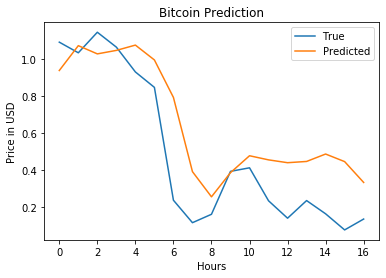

In [57]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X3.values, y3.values, shuffle=False, test_size=0.2)

reg = RandomForestRegressor(n_estimators=250, max_depth=100, random_state=28)
reg.fit(X_train2, y_train2)
y_pred = reg.predict(X_test2)
print('MSE:', mean_squared_error(y_test2, y_pred))
print('MAE:', mean_absolute_error(y_test2, y_pred))

plt.plot(y_test2, label='True')
plt.plot(y_pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

In [58]:
y_pred_org = (y_pred * std) + mean
y_test_org = (y_test2 * std) + mean

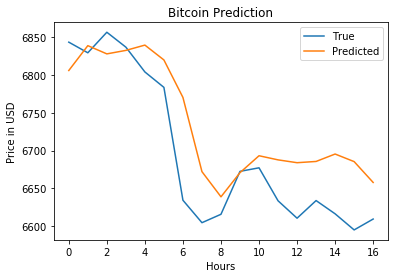

In [59]:
plt.plot(y_test_org, label='True')
plt.plot(y_pred_org, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

In [60]:
print('MSE:', mean_squared_error(y_test_org, y_pred_org))
print('MAE:', mean_absolute_error(y_test_org, y_pred_org))

MSE: 3332.3971898926065
MAE: 46.7077292456487


In [61]:
# Applying LSTM
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3.values, y3.values, shuffle=False, test_size=0.2)
X_train3.shape

(65, 4)

In [62]:
X_train3 = X_train3.reshape(X_train3.shape[0], 4 ,1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

model1 = Sequential()
model1.add(LSTM(128, input_shape=(4,1),return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(32, activation='tanh'))
model1.add(Dense(1, activation='linear'))

model1.compile(optimizer="adam", loss="mean_squared_error")

model1.fit(X_train3, y_train3, epochs=50)

# model1.evaluate(X_test3 , y_test3)

Train on 65 samples
Epoch 1/50
65/65 [==============================] - 6s 99ms/sample - loss: 1.1561
Epoch 2/50
65/65 [==============================] - 0s 784us/sample - loss: 1.0907
Epoch 3/50
65/65 [==============================] - 0s 600us/sample - loss: 1.0252
Epoch 4/50
65/65 [==============================] - 0s 842us/sample - loss: 0.9686
Epoch 5/50
65/65 [==============================] - 0s 615us/sample - loss: 0.8962
Epoch 6/50
65/65 [==============================] - 0s 723us/sample - loss: 0.8112
Epoch 7/50
65/65 [==============================] - 0s 646us/sample - loss: 0.7156
Epoch 8/50
65/65 [==============================] - ETA: 0s - loss: 0.473 - 0s 677us/sample - loss: 0.5967
Epoch 9/50
65/65 [==============================] - 0s 661us/sample - loss: 0.4733
Epoch 10/50
65/65 [==============================] - 0s 615us/sample - loss: 0.3762
Epoch 11/50
65/65 [==============================] - 0s 677us/sample - loss: 0.3416
Epoch 12/50
65/65 [=======================

MSE: 0.04792684933582315
MAE: 0.13846397992160556


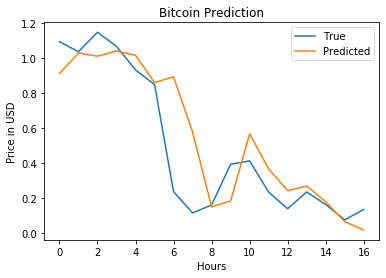

In [63]:
X_test3 = X_test2.reshape(X_test3.shape[0], 4, 1)
y_pred3 = model1.predict(X_test3)
print('MSE:', mean_squared_error(y_test3, y_pred3))
print('MAE:', mean_absolute_error(y_test3, y_pred3))

plt.plot(y_test3, label='True')
plt.plot(y_pred3, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 2861.2721765337856
MAE: 33.83195363275894


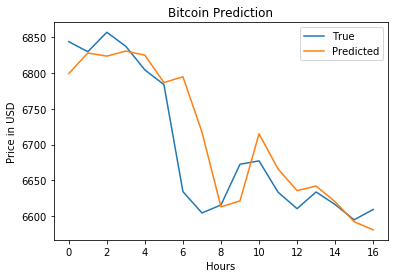

In [64]:
y_pred_org1 = (y_pred3 * std) + mean
y_test_org1 = (y_test3 * std) + mean
print('MSE:', mean_squared_error(y_test_org1, y_pred_org1))
print('MAE:', mean_absolute_error(y_test_org1, y_pred_org1))
plt.plot(y_test_org1, label='True')
plt.plot(y_pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction')
plt.legend()

MSE: 0.01957411034206081
MAE: 0.0999789032113582


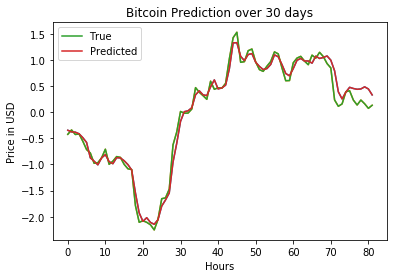

In [65]:
# over the entire 30 days time

pred = reg.predict(X3)
plt.plot(pred)
plt.plot(y3)
print('MSE:', mean_squared_error(y3, pred))
print('MAE:', mean_absolute_error(y3, pred))
plt.plot(y3, label='True')
plt.plot(pred, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction over 30 days')
plt.legend()

MSE: 1168.5898649845215
MAE: 24.428590518882697


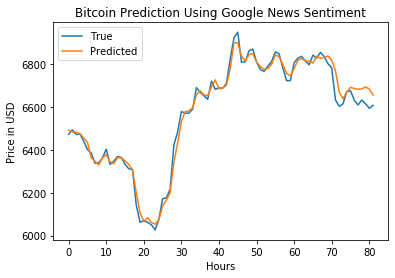

In [75]:
# 2 Hours Prediction - Not a huge jump from 17.343 to 24.42

pred_org1 = (pred * std) + mean
y_org1 = (y3 * std) + mean
print('MSE:', mean_squared_error(y_org1, pred_org1))
print('MAE:', mean_absolute_error(y_org1, pred_org1))
plt.plot(y_org1, label='True')
plt.plot(pred_org1, label='Predicted')
plt.ylabel('Price in USD')
plt.xlabel('Hours')
plt.title('Bitcoin Prediction Using Google News Sentiment')
plt.legend()

In [67]:
X_new

,Sentence,Date,Hour,sentiment-sentiment_score,price1,label1,volume1,Sentiment,score
0,The Official Pablo Escobar Phone Saga Is Bonkers,2020-03-29,7.0,"{'label': 'NEGATIVE', 'score': 0.9869203}",5989.014414,5945.645879,1.233530e+07,-1,0.9869203
1,Satoshi Nakaboto: ‘Bitcoin is now worth as muc...,2020-03-30,10.0,"{'label': 'POSITIVE', 'score': 0.9963661}",5982.209648,5958.296062,1.469059e+07,1,0.9963661
2,Crypto Traders See Bitcoin (But Not Ethereum) ...,2020-03-30,11.0,"{'label': 'POSITIVE', 'score': 0.951648}",5945.645879,5938.628824,7.071329e+06,1,0.951648
3,"'A glimmer of hope': Stocks, oil jump on signs...",2020-03-31,10.0,"{'label': 'POSITIVE', 'score': 0.99856013}",5958.296062,5878.498745,8.727236e+06,1,0.99856013
4,Satoshi Nakaboto: ‘Bitcoin and S&P 500 Index h...,2020-03-31,10.0,"{'label': 'NEGATIVE', 'score': 0.9787345}",5938.628824,5846.105782,1.074222e+07,-1,0.9787345
...,...,...,...,...,...,...,...,...,...
76,"Satoshi Nakaboto: ‘Not Bitcoin, but oil fell t...",2020-04-21,9.0,"{'label': 'NEGATIVE', 'score': 0.9994459}",6644.491545,6665.926015,1.080678e+07,-1,0.9994459
77,Typosquatting RubyGems laced with Bitcoin-nabb...,2020-04-21,9.0,"{'label': 'NEGATIVE', 'score': 0.9986516}",6638.578936,6658.380236,8.722346e+06,-1,0.9986516
78,The 2 Things About Marketing That Never Change,2020-04-21,14.0,"{'label': 'NEGATIVE', 'score': 0.9468405}",6665.926015,6670.001043,6.332538e+06,-1,0.9468405
79,Exclusive Interview: NFL Linebacker Russell Ok...,2020-04-21,16.0,"{'label': 'NEGATIVE', 'score': 0.9721771}",6658.380236,6648.183871,6.848651e+06,-1,0.9721771


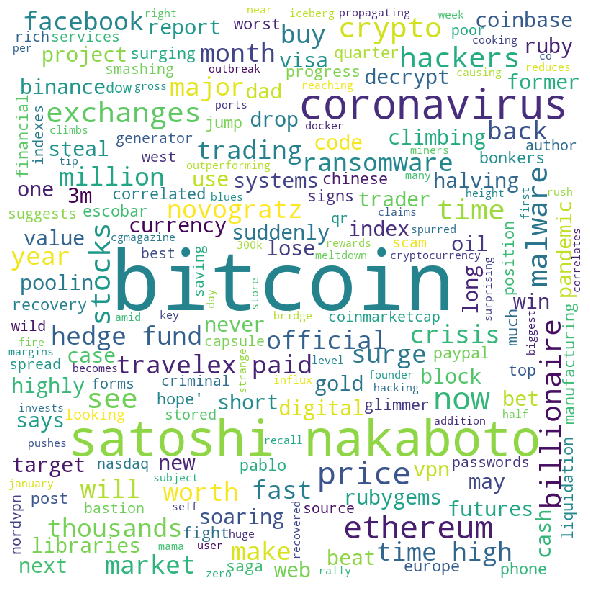

In [68]:
# Reads 'Youtube04-Eminem.csv' file  
df = X_new["Sentence"]
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

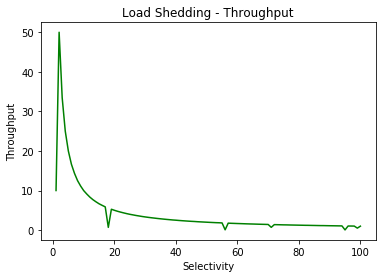

Wall time: 1.61 s


In [69]:
%%time
ip = sc.textFile("X_new.csv") \
#     .map(lambda line: line.split(",")).filter(lambda line :len(line)>3).map(lambda x : (x[0]))

# df1 = pd.DataFrame(ip, columns = ["price"])
# df1.to_csv("df1.csv", index=False)
# df1 = sc.textFile("df1.csv").map(lambda line: line.split(",")).collect()
# # print(df1)
# df1 = pd.DataFrame(df1, columns = ["price"])
# print(df1)

X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i=1

while i<=100:
    s=float(i)   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)

    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)
                
        throughA2=throughA
        X[i-1] = s
        Y[i-1]=throughA2/10
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('Selectivity')
plt.ylabel("Throughput")
plt.title('Load Shedding - Throughput')
plt.show()

In [70]:
# Generate Uniform Integer Array of n values
from random import sample
n = 100
s = np.random.randint(100, size = (n, ))
average_array = np.average(s)
# s_1 = sample(pd.Series(s).to_list(),3)
X1=[0 for a in range(100)]
Y1=[0 for a in range(100)]
i = 1
t = 1
u = 1

while i<=100:
    u=float(i) 
    s_1 = sample(pd.Series(s).to_list(),t)
    print(s_1)
    average1 = np.average(s_1)
    accuracy_100 = (average1-average_array)/average_array
    accuracy1 = abs(accuracy_100)
    print(1-accuracy1)
    X1[i-1] = u
    Y1[i-1]=(1-accuracy1) * 100
    t=t+1
    i=i+1

[80]
0.43014128728414447
[45, 68]
0.891287284144427
[95, 92, 76]
0.2796964939822082
[83, 37, 33, 17]
0.8339874411302983
[72, 63, 24, 38, 22]
0.8594976452119308
[30, 81, 5, 10, 38, 77]
0.7881998953427525
[30, 49, 30, 98, 59, 86, 34]
0.9179188158779995
[86, 71, 51, 95, 63, 49, 72, 43]
0.6999607535321821
[25, 48, 88, 82, 66, 77, 27, 53, 50]
0.8749345892203035
[34, 67, 71, 31, 98, 64, 33, 80, 61, 53]
0.8383045525902668
[88, 8, 71, 86, 45, 37, 92, 53, 67, 97, 6]
0.8404452690166976
[3, 92, 33, 93, 24, 33, 33, 99, 37, 9, 72, 57]
0.9566326530612245
[61, 96, 71, 68, 22, 86, 33, 89, 49, 30, 51, 75, 82]
0.7727931409250091
[3, 27, 22, 96, 67, 51, 99, 80, 93, 92, 73, 59, 27, 3]
0.8898856245795022
[25, 26, 27, 20, 61, 33, 24, 71, 66, 43, 12, 40, 7, 52, 82]
0.7705389848246991
[96, 25, 38, 37, 45, 4, 98, 45, 40, 94, 59, 6, 8, 38, 30, 26]
0.8450255102040816
[40, 92, 12, 93, 80, 63, 68, 89, 3, 5, 49, 30, 61, 26, 62, 51, 47]
0.9945978391356542
[52, 62, 27, 3, 27, 73, 86, 9, 8, 9, 10, 34, 33, 94, 30, 47, 

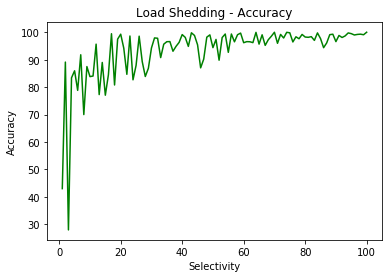

In [71]:
plt.figure()  
plt.plot(X1,Y1, 'g')   
plt.ylabel('Accuracy')
plt.xlabel('Selectivity')
plt.title('Load Shedding - Accuracy')
#plt.axis([0, 1, 0, 1])
plt.show()

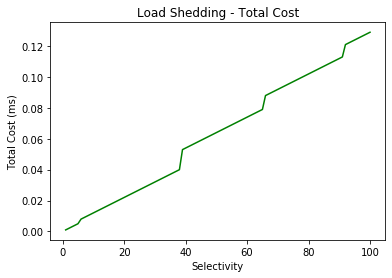

In [72]:
X=[0 for a in range(100)]
Y=[0 for a in range(100)]
i=1
b = 0
while i<=100:
    s=i   
    a1=datetime.now()
    a_operator = ip.filter(lambda x: x%2 == 1)
    a2=datetime.now()
    #microseconds
    micro1=0.000001*(a2-a1).microseconds
    #seconds
    second1=(a2-a1).seconds  
    #overall time passing A
    cost_a=second1+micro1
    b += cost_a
    tolerance = 1e-4
    if cost_a > tolerance:
        throughA=1/(cost_a*s)
                
        throughA2=throughA
        X[i-1] = s
        Y[i-1]= b
        i=i+1
import matplotlib.pyplot as plt
plt.figure()  
plt.plot(X,Y, 'g')   
plt.xlabel('Selectivity')
plt.ylabel("Total Cost (ms)")
plt.title('Load Shedding - Total Cost')
plt.show()